In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
import datetime, warnings, scipy
from scipy.optimize import curve_fit
from plotly_calplot import calplot

pd.set_option("display.max_columns", 500)
pal = sns.color_palette()

In [2]:
df = pd.read_csv("C:/Users/cj.alonzo/OneDrive - Nice Systems Ltd/Documents/Personal/Data Science/personal projects/delays/merged_data_with_airlines.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20604118 entries, 0 to 20604117
Data columns (total 23 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   TAIL_NUM             object 
 5   OP_CARRIER_FL_NUM    int64  
 6   ORIGIN               object 
 7   ORIGIN_CITY_NAME     object 
 8   DEST                 object 
 9   DEST_CITY_NAME       object 
 10  DEP_TIME             object 
 11  DEP_DELAY            float64
 12  DEP_DEL15            float64
 13  ARR_TIME             object 
 14  ARR_DELAY            float64
 15  ARR_DEL15            float64
 16  CARRIER_DELAY        float64
 17  WEATHER_DELAY        float64
 18  NAS_DELAY            float64
 19  SECURITY_DELAY       float64
 20  LATE_AIRCRAFT_DELAY  float64
 21  AIRLINE              object 
 22  DATE                 object 
dtypes: float64(9), int64(5), objec

In [4]:
df.head()

YEAR  MONTH  DAY  DAY_OF_WEEK TAIL_NUM  OP_CARRIER_FL_NUM ORIGIN  \
0  2021      1    1            5   N131EV               4656    ATL   
1  2021      1    1            5   N131EV               4656    JAN   
2  2021      1    1            5   N131EV               4889    ATL   
3  2021      1    1            5   N131EV               4936    OKC   
4  2021      1    1            5   N132EV               4698    BHM   

        ORIGIN_CITY_NAME DEST         DEST_CITY_NAME             DEP_TIME  \
0            Atlanta, GA  JAN  Jackson/Vicksburg, MS  1900-01-01 14:46:00   
1  Jackson/Vicksburg, MS  ATL            Atlanta, GA  1900-01-01 15:42:00   
2            Atlanta, GA  GSP              Greer, SC  1900-01-01 20:44:00   
3      Oklahoma City, OK  ATL            Atlanta, GA  1900-01-01 08:56:00   
4         Birmingham, AL  ATL            Atlanta, GA  1900-01-01 15:00:00   

   DEP_DELAY  DEP_DEL15             ARR_TIME  ARR_DELAY  ARR_DEL15  \
0      256.0        1.0  1900-01-01 15:02:00      249.0        1.0   
1      237.0        1.0  1900-01-01 17:49:00      218.0        1.0   
2       14.0        0.0  1900-01-01 21:28:00        7.0        0.0   
3      176.0        1.0  1900-01-01 13:01:00      238.0        1.0   
4       -5.0        0.0  1900-01-01 17:01:00       -3.0        0.0   

   CARRIER_DELAY  WEATHER_DELAY  NAS_DELAY  SECURITY_DELAY  \
0           49.0            0.0        0.0             0.0   
1            0.0            0.0        0.0             0.0   
2            0.0            0.0        0.0             0.0   
3            0.0          176.0       62.0             0.0   
4            0.0            0.0        0.0             0.0   

   LATE_AIRCRAFT_DELAY       AIRLINE        DATE  
0                200.0  Endeavor Air  2021-01-01  
1                218.0  Endeavor Air  2021-01-01  
2                  0.0  Endeavor Air  2021-01-01  
3                  0.0  Endeavor Air  2021-01-01  
4                  0.0  Endeavor Air  2021-01-01

In [5]:
((df.isnull().sum() / len(df)) * 100).sort_values(ascending = False)

ARR_DEL15              2.156841
ARR_DELAY              2.156841
ARR_TIME               1.940379
DEP_DELAY              1.865768
DEP_DEL15              1.865768
DEP_TIME               1.864666
TAIL_NUM               0.413311
AIRLINE                0.000000
LATE_AIRCRAFT_DELAY    0.000000
SECURITY_DELAY         0.000000
NAS_DELAY              0.000000
WEATHER_DELAY          0.000000
CARRIER_DELAY          0.000000
YEAR                   0.000000
MONTH                  0.000000
DEST_CITY_NAME         0.000000
DEST                   0.000000
ORIGIN_CITY_NAME       0.000000
ORIGIN                 0.000000
OP_CARRIER_FL_NUM      0.000000
DAY_OF_WEEK            0.000000
DAY                    0.000000
DATE                   0.000000
dtype: float64

In [6]:
# Assuming you have already created the 'DATE' column
df.rename(columns={'DAY_OF_MONTH': 'DAY'}, inplace=True)
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])

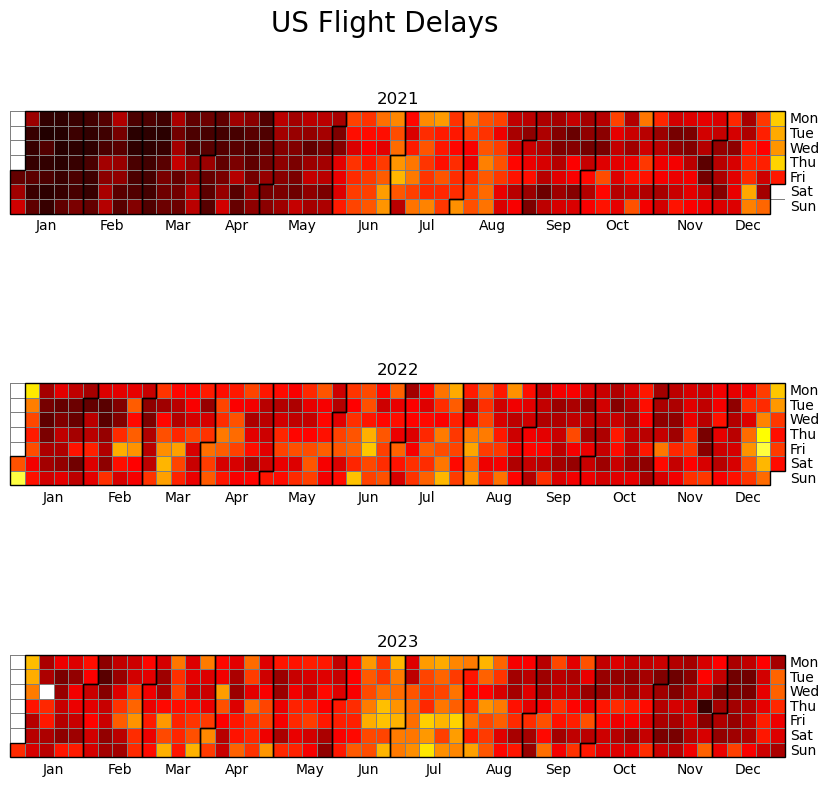

In [7]:
#a lot of delays in summer and christmas time. maybe more flights?

#group by "DATE" and count the number of delayed flights (DEP_DEL15 == 1)
delay_counts = df.groupby("DATE")["DEP_DEL15"].apply(lambda x: (x == 1).sum())

#normalize the delay counts to the range [0, 1]
max_delay_count = delay_counts.max()
normalized_delay_counts = delay_counts / max_delay_count

#subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

#iterate over years and create year plots
for i, year in enumerate([2021, 2022, 2023]):
    #Year plot using calmap
    calmap.yearplot(
        delay_counts,  #Use delay counts as shading intensity
        year=year,
        cmap="hot",
        fillcolor="white",
        monthly_border=True,
        ax=axs[i],
        linewidth=0.5,
        linecolor="gray",
        vmin=0,  #Set minimum intensity to 0
        vmax=max_delay_count,  #Set maximum intensity to the maximum delay count
    )
    axs[i].set_title(year)

#plot properties
fig.patch.set_facecolor("white")
fig.suptitle("US Flight Delays", y=0.92, fontsize=20)
plt.show()

In [8]:
#interactive version
fig = calplot(delay_counts.apply(np.log).reset_index(), x="DATE", y="DEP_DEL15")
fig.show()

In [9]:
#columns of interest
columns_of_interest = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']

#Carrier Delay is within the control of the air carrier like: plane cleaning, damage, waiting arrival of connecting passengers or crew, baggage, cargo, catering, etc
#Weather Delay is caused by extreme or hazardous forecasted weather conditions
#NAS Delay is within the control of the National Airspace System (NAS) like: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.
#Security Delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.

#count the 1s in each column and sum them
delay_counts = df[columns_of_interest].sum().sort_values(ascending = False)

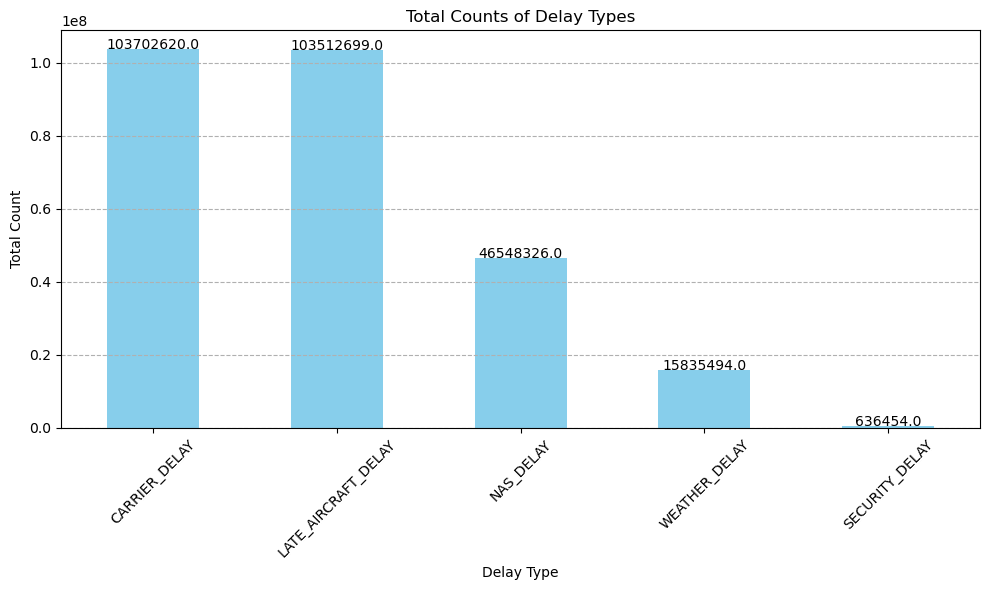

In [10]:
#bar graph
plt.figure(figsize=(10, 6))
delay_counts.plot(kind='bar', color='skyblue')
plt.title('Total Counts of Delay Types')
plt.xlabel('Delay Type')
plt.ylabel('Total Count')
plt.xticks(rotation=45)  #Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=1)

#text labels above each bar
for i, count in enumerate(delay_counts):
    plt.text(i, count + 0.1, str(count), ha='center')

plt.tight_layout()
plt.show()

In [11]:
#filter delays greater than 0 minutes and less than 30 minutes
filtered_delays = df[(df['DEP_DELAY'] > 0) & (df['DEP_DELAY'] < 30)]

#group data by 'DEP_DELAY', count each unique variable, create a new column when resetting, and rename the column with the counts as Count
grouped_delay = filtered_delays.groupby('DEP_DELAY').size().reset_index().rename(columns={0: 'Count'})

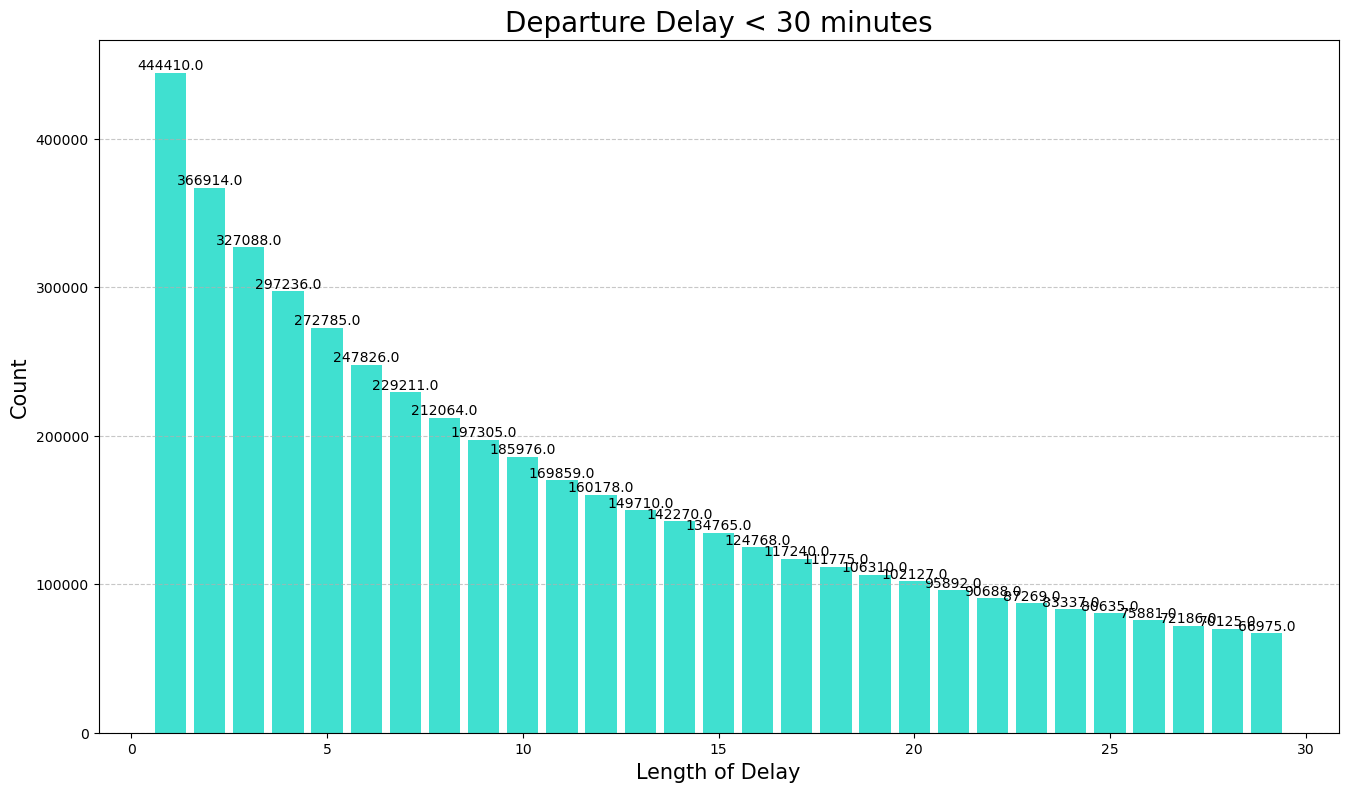

In [12]:
#bar graph
plt.figure(figsize=(16, 9))
plt.bar(data=grouped_delay, x='DEP_DELAY', height='Count', color='turquoise')

#Ttitle and axis labels
plt.title('Departure Delay < 30 minutes', fontsize=20)
plt.xlabel('Length of Delay', fontsize=15)
plt.ylabel('Count', fontsize=15)

#grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

#value labels above each bar
for index, row in grouped_delay.iterrows():
    plt.text(row['DEP_DELAY'], row['Count'], str(row['Count']), ha='center', va='bottom', fontsize=10)

plt.show()

In [13]:
#new column specifying how bad the delay was
df["DelayGroup"] = None
df.loc[df["DEP_DELAY"] <= 0, "DelayGroup"] = "Early or On Time"
df.loc[(df["DEP_DELAY"] > 0) & (df["DEP_DELAY"] <= 15), "DelayGroup"] = "Small Delay"
df.loc[(df["DEP_DELAY"] > 15) & (df["DEP_DELAY"] <= 45), "DelayGroup"] = "Medium Delay"
df.loc[df["DEP_DELAY"] > 45, "DelayGroup"] = "Large Delay"

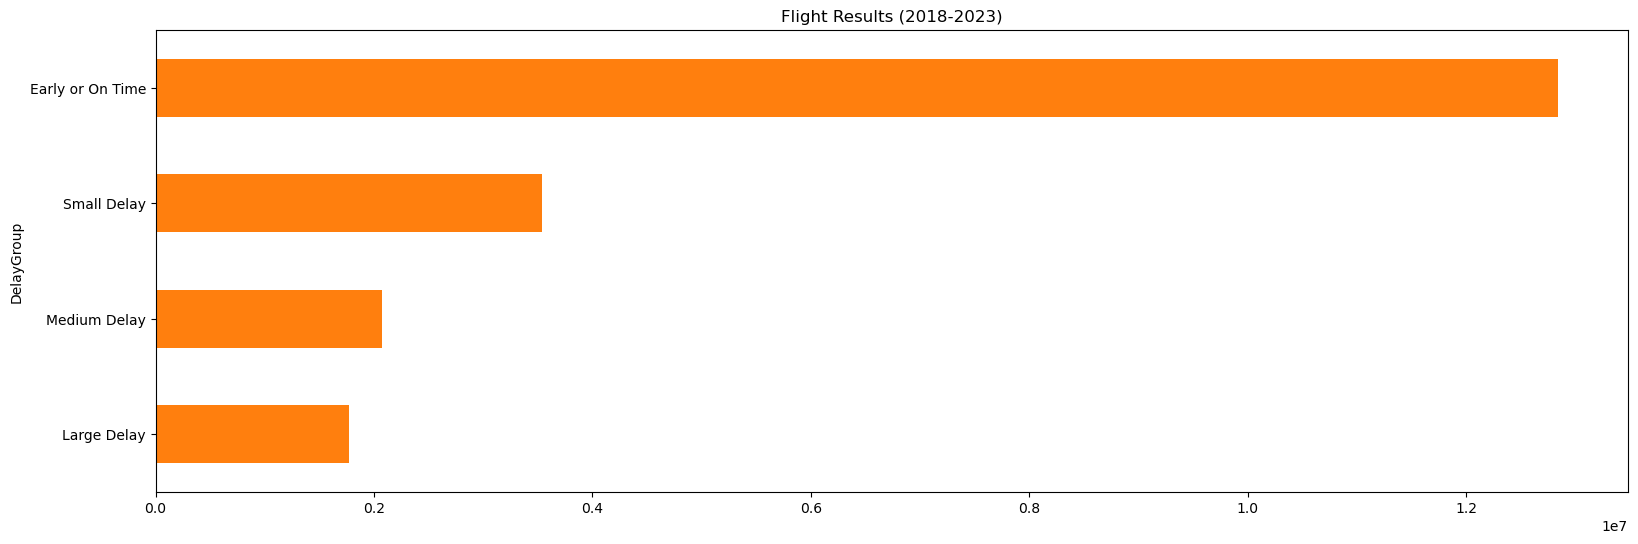

In [14]:
#most flights were early or on time
df["DelayGroup"].value_counts(ascending=True).plot(
    kind="barh", figsize=(19, 6), color=pal[1], title="Flight Results (2018-2023)"
)
plt.show()

In [15]:
#20mil+ flights
df.shape

(20604118, 24)

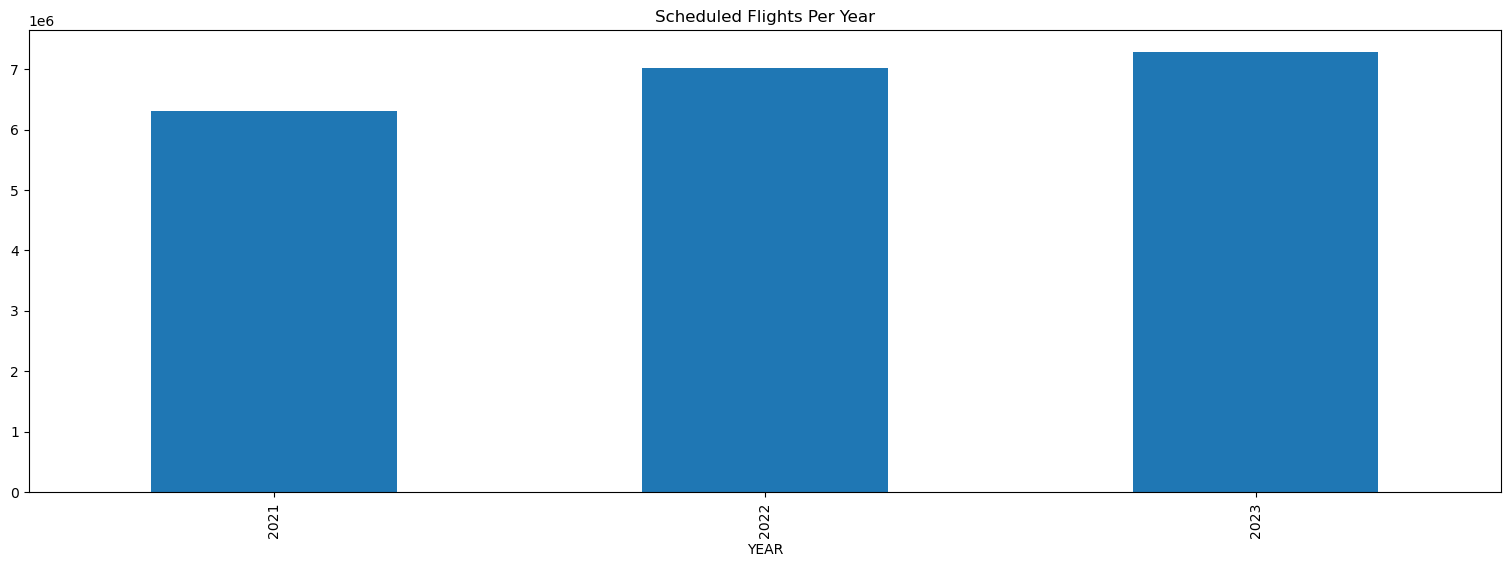

In [16]:
#more flights each year
df["YEAR"].value_counts().sort_index().plot(
    kind="bar", figsize=(19, 6), title="Scheduled Flights Per Year"
)

plt.show()

In [17]:
#percentage of delays
df_month = df.groupby("MONTH")["DelayGroup"].value_counts(normalize=True).unstack() * 100
col_order = ["Early or On Time", "Small Delay", "Medium Delay", "Large Delay"]
df_month[col_order].style.background_gradient(cmap="Blues")

In [18]:
#reset Description categories
df["AIRLINE"] = df["AIRLINE"].astype("str").astype("category")

#count each instance(flight) of airline
airline_counts = df["AIRLINE"].value_counts()

print('Total Airline Flights \n', airline_counts, '\n')

Total Airline Flights 
 AIRLINE
Southwest Airlines Co.                     3810254
Delta Air Lines                            2626156
American Airlines                          2551075
SkyWest Airlines                           2162222
United Air Lines                           1805522
Republic Airline                            945199
JetBlue Airways                             750612
Envoy Air                                   731268
Endeavor Air                                700418
Spirit Air Lines                            687632
Alaska Airlines                             662683
PSA Airlines                                631209
Frontier Airlines                           470166
Mesa Airlines                               363221
Allegiant Air                               348297
Piedmont Airlines                           284019
Horizon Air                                 269018
CommuteAir LLC dba CommuteAir               225395
Hawaiian Airlines                           215374

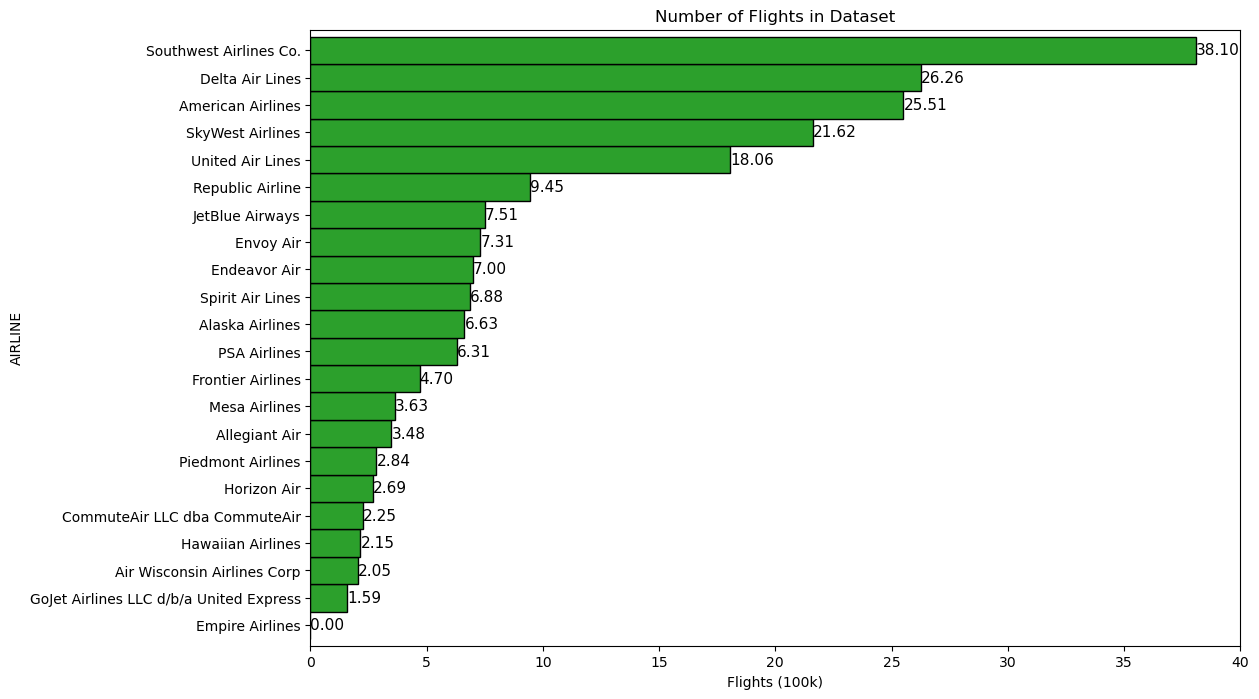

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))

#horizontal bar plot
airlines_ordered = (df["AIRLINE"].value_counts(ascending=True) / 100_000).plot(
    kind="barh", ax=ax, color=pal[2], width=1, edgecolor="black"
)

#count labels next to each bar
for bar in airlines_ordered.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():,.2f}',
             va='center', ha='left', fontsize=11)

ax.set_title("Number of Flights in Dataset")
ax.set_xlabel("Flights (100k)")
plt.show()

In [20]:
#group airline and delay group, calculate the normalized counts
df_agg = (
    df.groupby(["AIRLINE", "DelayGroup"])
    .size()
    .unstack()
    .fillna(0)
    .apply(lambda x: x / x.sum(), axis=1)
)

#count instances of each airline
airline_counts = df["AIRLINE"].value_counts()

#filter airlines with at least 210000 flights
filtered_airlines = airline_counts[airline_counts >= 210000].index

#filter DataFrame based on selected airlines
df_filtered = df[df["AIRLINE"].isin(filtered_airlines)]

In [21]:
delay_mapping = {
    "Early or On Time": "Good",
    "Small Delay": "Good",
    "Medium Delay": "Bad",
    "Large Delay": "Bad",
}

In [22]:
df_filtered["DelayOk"] = df_filtered["DelayGroup"].map(delay_mapping)

C:\Users\cj.alonzo\AppData\Local\Temp\ipykernel_11008\1682589706.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
df_filtered.head()

YEAR  MONTH  DAY  DAY_OF_WEEK TAIL_NUM  OP_CARRIER_FL_NUM ORIGIN  \
0  2021      1    1            5   N131EV               4656    ATL   
1  2021      1    1            5   N131EV               4656    JAN   
2  2021      1    1            5   N131EV               4889    ATL   
3  2021      1    1            5   N131EV               4936    OKC   
4  2021      1    1            5   N132EV               4698    BHM   

        ORIGIN_CITY_NAME DEST         DEST_CITY_NAME             DEP_TIME  \
0            Atlanta, GA  JAN  Jackson/Vicksburg, MS  1900-01-01 14:46:00   
1  Jackson/Vicksburg, MS  ATL            Atlanta, GA  1900-01-01 15:42:00   
2            Atlanta, GA  GSP              Greer, SC  1900-01-01 20:44:00   
3      Oklahoma City, OK  ATL            Atlanta, GA  1900-01-01 08:56:00   
4         Birmingham, AL  ATL            Atlanta, GA  1900-01-01 15:00:00   

   DEP_DELAY  DEP_DEL15             ARR_TIME  ARR_DELAY  ARR_DEL15  \
0      256.0        1.0  1900-01-01 15:02:00      249.0        1.0   
1      237.0        1.0  1900-01-01 17:49:00      218.0        1.0   
2       14.0        0.0  1900-01-01 21:28:00        7.0        0.0   
3      176.0        1.0  1900-01-01 13:01:00      238.0        1.0   
4       -5.0        0.0  1900-01-01 17:01:00       -3.0        0.0   

   CARRIER_DELAY  WEATHER_DELAY  NAS_DELAY  SECURITY_DELAY  \
0           49.0            0.0        0.0             0.0   
1            0.0            0.0        0.0             0.0   
2            0.0            0.0        0.0             0.0   
3            0.0          176.0       62.0             0.0   
4            0.0            0.0        0.0             0.0   

   LATE_AIRCRAFT_DELAY       AIRLINE       DATE        DelayGroup DelayOk  
0                200.0  Endeavor Air 2021-01-01       Large Delay     Bad  
1                218.0  Endeavor Air 2021-01-01       Large Delay     Bad  
2                  0.0  Endeavor Air 2021-01-01       Small Delay    Good  
3                  0.0  Endeavor Air 2021-01-01       Large Delay     Bad  
4                  0.0  Endeavor Air 2021-01-01  Early or On Time    Good

In [24]:
#group by airline and delay group, calculate the normalized counts again
df_agg = (
    df_filtered.groupby(["AIRLINE", "DelayGroup"])
    .size()
    .unstack()
    .fillna(0)
    .apply(lambda x: x / x.sum(), axis=1)
)

#sort the airlines based on total flights
df_agg_sorted = df_agg.loc[airline_counts.loc[filtered_airlines].sort_values(ascending=True).index]

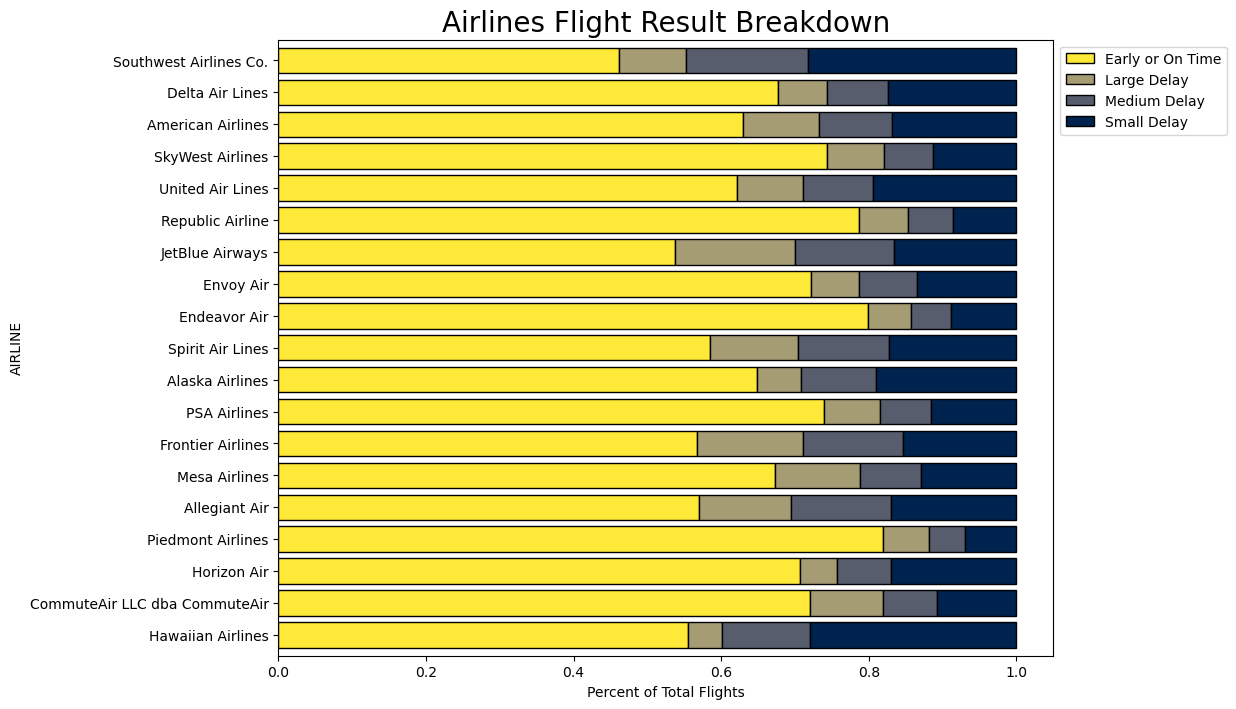

In [25]:
#choose a colormap (e.g., 'viridis')
cmap = plt.get_cmap('cividis_r')

#stacked bar plot with colormap
fig, ax = plt.subplots(figsize=(10, 8))
df_agg_sorted.plot(kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black", colormap=cmap)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Airlines Flight Result Breakdown", fontsize=20)
ax.set_xlabel("Percent of Total Flights")
plt.show()

In [26]:
#group by airline and delay group, calculate the normalized counts again
df_agg = (
    df_filtered.groupby(["AIRLINE"])["DelayOk"]
    .value_counts(normalize=True)
    .unstack()[["Good", "Bad"]]
)

#count instances of each airline
airline_counts = df_filtered["AIRLINE"].value_counts()

#sort the airlines based on the most "Good" delays
df_agg_sorted = df_agg.loc[filtered_airlines].sort_values(by="Good", ascending=False)

#display the sorted DataFrame
print(df_agg_sorted)

DelayOk                            Good       Bad
AIRLINE                                          
Piedmont Airlines              0.888361  0.111639
Endeavor Air                   0.887110  0.112890
Horizon Air                    0.875716  0.124284
Republic Airline               0.872786  0.127214
SkyWest Airlines               0.856294  0.143706
Envoy Air                      0.855913  0.144087
PSA Airlines                   0.854786  0.145214
Delta Air Lines                0.851519  0.148481
Alaska Airlines                0.837737  0.162263
Hawaiian Airlines              0.835256  0.164744
CommuteAir LLC dba CommuteAir  0.827683  0.172317
United Air Lines               0.815033  0.184967
Mesa Airlines                  0.801682  0.198318
American Airlines              0.797992  0.202008
Spirit Air Lines               0.757199  0.242801
Southwest Airlines Co.         0.744038  0.255962
Allegiant Air                  0.739579  0.260421
Frontier Airlines              0.720112  0.279888


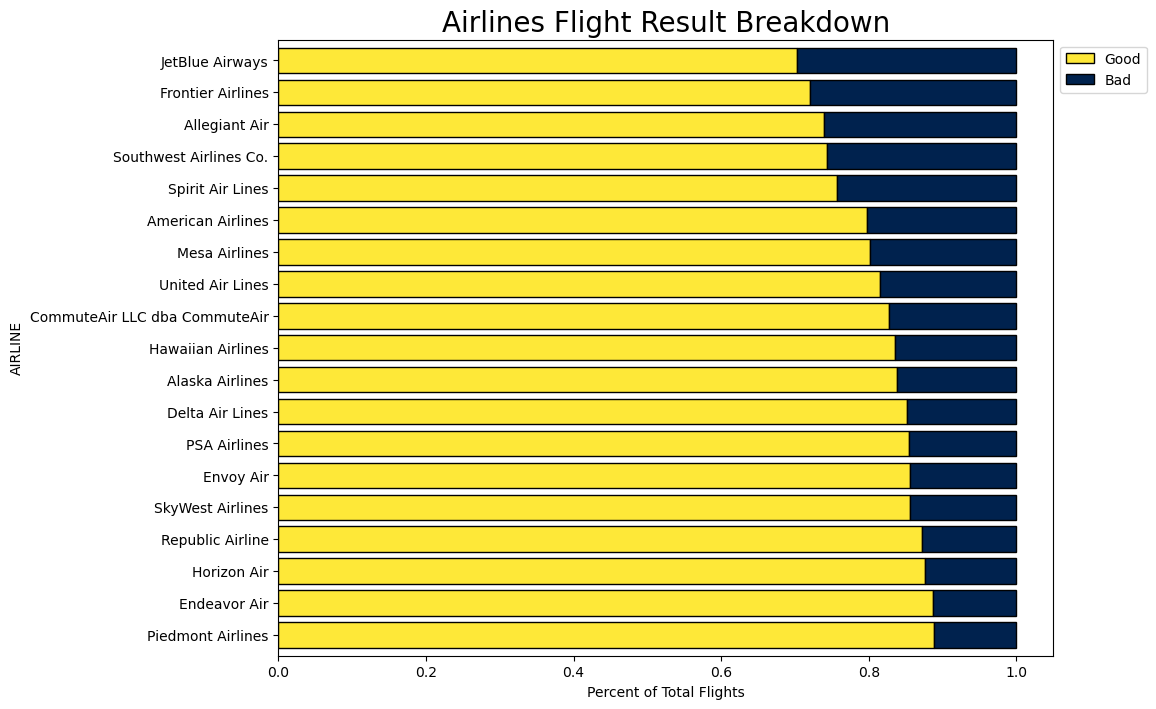

In [27]:
#stacked bar plot
fig, ax = plt.subplots(figsize=(10, 8))
df_agg_sorted.plot(kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black", colormap=cmap)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Airlines Flight Result Breakdown", fontsize=20)
ax.set_xlabel("Percent of Total Flights")
plt.show()

In [28]:
#define a function to calculate stats
def get_stats(x):
    return pd.Series({
        'min': x.min(),
        'max': x.max(),
        'count': x.count(),
        'mean': x.mean()
    })

In [29]:
#stats for mean delays per airport
airport_stats = df['DEP_DELAY'].groupby(df['ORIGIN_CITY_NAME']).apply(get_stats).unstack()

#sort the statistics by count in descending order
airport_stats = airport_stats.sort_values('mean', ascending=False)

print(airport_stats)

                   min     max   count       mean
ORIGIN_CITY_NAME                                 
Pago Pago, TT    -31.0  1551.0   202.0  44.920792
Bishop, CA       -23.0  1207.0   592.0  32.369932
Santa Maria, CA  -30.0  1332.0   548.0  25.941606
Stockton, CA     -30.0  1393.0  1777.0  25.157569
Aguadilla, PR    -40.0  1387.0  6701.0  24.970004
...                ...     ...     ...        ...
Nome, AK         -38.0   438.0  1943.0  -2.794647
Kotzebue, AK     -99.0   264.0  1929.0  -3.046656
Saipan, TT       -41.0   664.0  1041.0  -5.826129
Gustavus, AK     -39.0   119.0   268.0  -6.671642
Deadhorse, AK    -45.0   434.0  1249.0  -7.290633

[374 rows x 4 columns]


In [30]:
#create a dataframe with stats on each airline based on delay LENGTH
global_stats = df['DEP_DELAY'].groupby(df['AIRLINE']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('mean', ascending = False)
global_stats

min     max      count       mean
AIRLINE                                                                     
JetBlue Airways                          -73.0  2508.0   731946.0  21.880971
Frontier Airlines                        -59.0  1393.0   460387.0  18.740892
Mesa Airlines                            -35.0  2186.0   353210.0  16.850769
Allegiant Air                            -45.0  2065.0   339665.0  16.372099
Spirit Air Lines                         -52.0  1587.0   670834.0  15.541027
American Airlines                        -47.0  4413.0  2500286.0  14.945120
Southwest Airlines Co.                   -52.0   975.0  3730507.0  13.097314
CommuteAir LLC dba CommuteAir            -34.0  1488.0   220089.0  12.825366
Air Wisconsin Airlines Corp              -43.0  1498.0   199922.0  12.530072
United Air Lines                        -105.0  1652.0  1778194.0  11.658421
GoJet Airlines LLC d/b/a United Express  -44.0  1653.0   152473.0  11.483896
SkyWest Airlines                         -72.0  5995.0  2128199.0   9.811617
Delta Air Lines                          -60.0  1311.0  2598970.0   8.966831
PSA Airlines                             -53.0  4225.0   620449.0   7.651380
Hawaiian Airlines                        -46.0  1847.0   213428.0   7.514440
Envoy Air                                -45.0  5327.0   718476.0   6.926624
Endeavor Air                             -90.0  1973.0   687486.0   6.132484
Republic Airline                         -56.0  7223.0   917608.0   5.702346
Alaska Airlines                          -99.0  1280.0   651793.0   5.662802
Horizon Air                              -38.0   979.0   265184.0   4.851122
Piedmont Airlines                        -41.0  1856.0   280475.0   4.100266
Empire Airlines                          -11.0    85.0      112.0   1.848214

In [31]:
#delay across all airlines
overall_mean_delay = df['DEP_DELAY'].mean()

#standard deviation of the mean delays across airlines
std_dev_mean_delay = df['DEP_DELAY'].groupby(df['AIRLINE']).mean().std()

#range around the overall mean delay
lower_bound = overall_mean_delay - std_dev_mean_delay
upper_bound = overall_mean_delay + std_dev_mean_delay

#calculate middle of the range
middle_delay = (lower_bound + upper_bound) / 2

#calculate difference needed to reach the lower and upper bounds
lower_difference = overall_mean_delay - lower_bound
upper_difference = upper_bound - overall_mean_delay

In [32]:
#stat results
print(f"Mean Delay Range: {lower_bound:.2f} to {upper_bound:.2f} minutes")
print(f"Average delay is {middle_delay:.2f} ±{lower_difference:.2f} minutes")

Mean Delay Range: 6.20 to 16.72 minutes
Average delay is 11.46 ±5.26 minutes


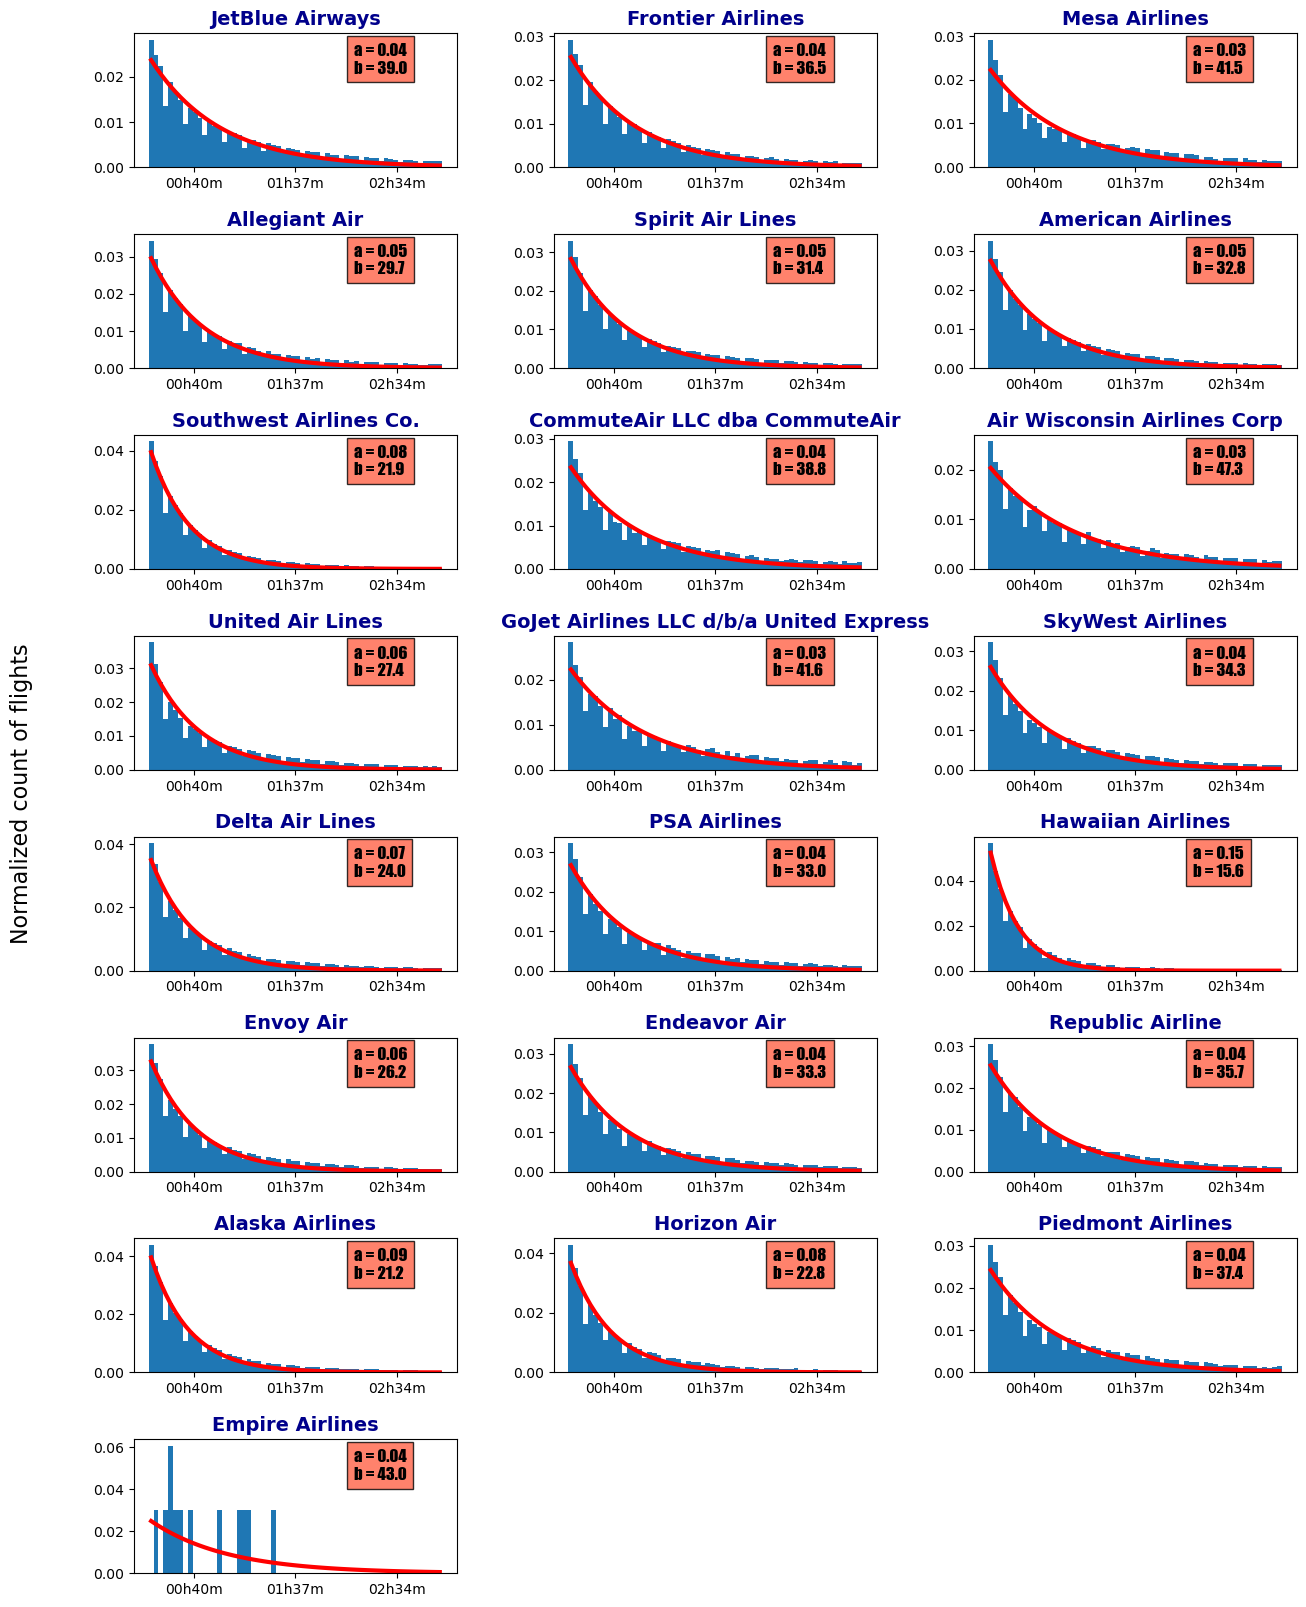

In [33]:
#low a value = LARGE amount of important delays
#high a value = small amount of delays (punctual)

num_carriers = len(global_stats.index)
num_rows = (num_carriers + 2) // 3
num_cols = min(num_carriers, 3)

fig = plt.figure(1, figsize=(15, 20))

for i, carrier_name in enumerate(global_stats.index, start=1):
    ax = fig.add_subplot(num_rows, num_cols, i)
    
    #fit of the distribution
    n, bins, patches = plt.hist(x=df[df['AIRLINE'] == carrier_name]['DEP_DELAY'],
                                range=(15, 180), density=True, bins=60)
    bin_centers = bins[:-1] + 0.5 * (bins[1:] - bins[:-1])
    
    #function to fit the histogram
    def func(x, a, b):
        return a * np.exp(-x / b)
    
    #curve fitting
    popt, pcov = curve_fit(func, bin_centers, n, p0=[1, 2])
    
    #draw fit curve
    plt.plot(bin_centers, func(bin_centers, *popt), 'r-', linewidth=3)
    
    #calculate middle time delay and 25% deviation
    middle_delay = np.median(bin_centers)
    deviation = np.percentile(bin_centers, 25)
    
    #set tick positions and labels
    tick_positions = [middle_delay - deviation, middle_delay, middle_delay + deviation]
    tick_labels = ['{:02d}h{:02d}m'.format(*divmod(int(x), 60)) for x in tick_positions]
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_labels)
    
    #subplot title
    plt.title(carrier_name, fontsize=14, fontweight='bold', color='darkblue')
    
    #legend: values of the a and b coefficients
    ax.text(0.68, 0.7, 'a = {}\nb = {}'.format(round(popt[0], 2), round(popt[1], 1)),
            style='italic', transform=ax.transAxes, fontsize=12, family='fantasy',
            bbox={'facecolor': 'tomato', 'alpha': 0.8, 'pad': 5})
    
    #add label for Normalized count of flights
    if i == num_rows * num_cols // 2:  #Check if this subplot is in the middle
        fig.text(0.05, 0.5, 'Normalized count of flights', fontsize=16, rotation=90,
                  color='k', horizontalalignment='center', verticalalignment='center')
    

#adjust margins between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

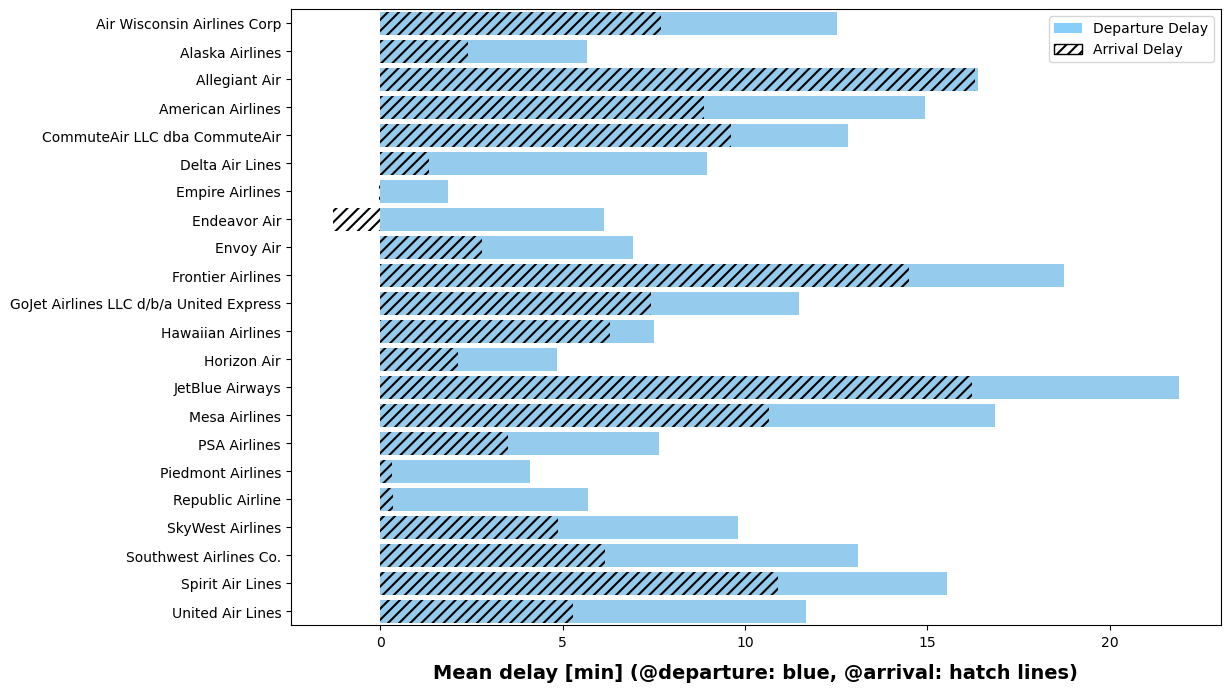

In [34]:
#delays at ARRIVAL are generally LOWER than at departure

#set hatch linewidth
plt.rcParams['hatch.linewidth'] = 1.5
fig = plt.figure(1, figsize=(12,8))
ax = sns.barplot(x='DEP_DELAY', y='AIRLINE', data=df, color='lightskyblue', errorbar=None)
ax = sns.barplot(x='ARR_DELAY', y='AIRLINE', data=df, color='r', hatch='///', alpha=0.0, errorbar=None)

#tick labels from y-axis
labels = [item.get_text() for item in ax.get_yticklabels()]

#set tick labels as the y-axis labels
ax.set_yticklabels(labels)

#hide y-axis label
ax.yaxis.label.set_visible(False)

#set x-axis label
plt.xlabel('Mean delay [min] (@departure: blue, @arrival: hatch lines)', fontsize=14, weight='bold', labelpad=10)

#create legend
handles = [plt.Rectangle((0,0),1,1,fc='lightskyblue', edgecolor = 'none'),
           plt.Rectangle((0,0),1,1,fc='none', hatch = '///', edgecolor = 'black')]
labels = ['Departure Delay', 'Arrival Delay']
plt.legend(handles, labels)
plt.show()

C:\Users\cj.alonzo\AppData\Local\Temp\ipykernel_11008\1759754981.py:9: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.



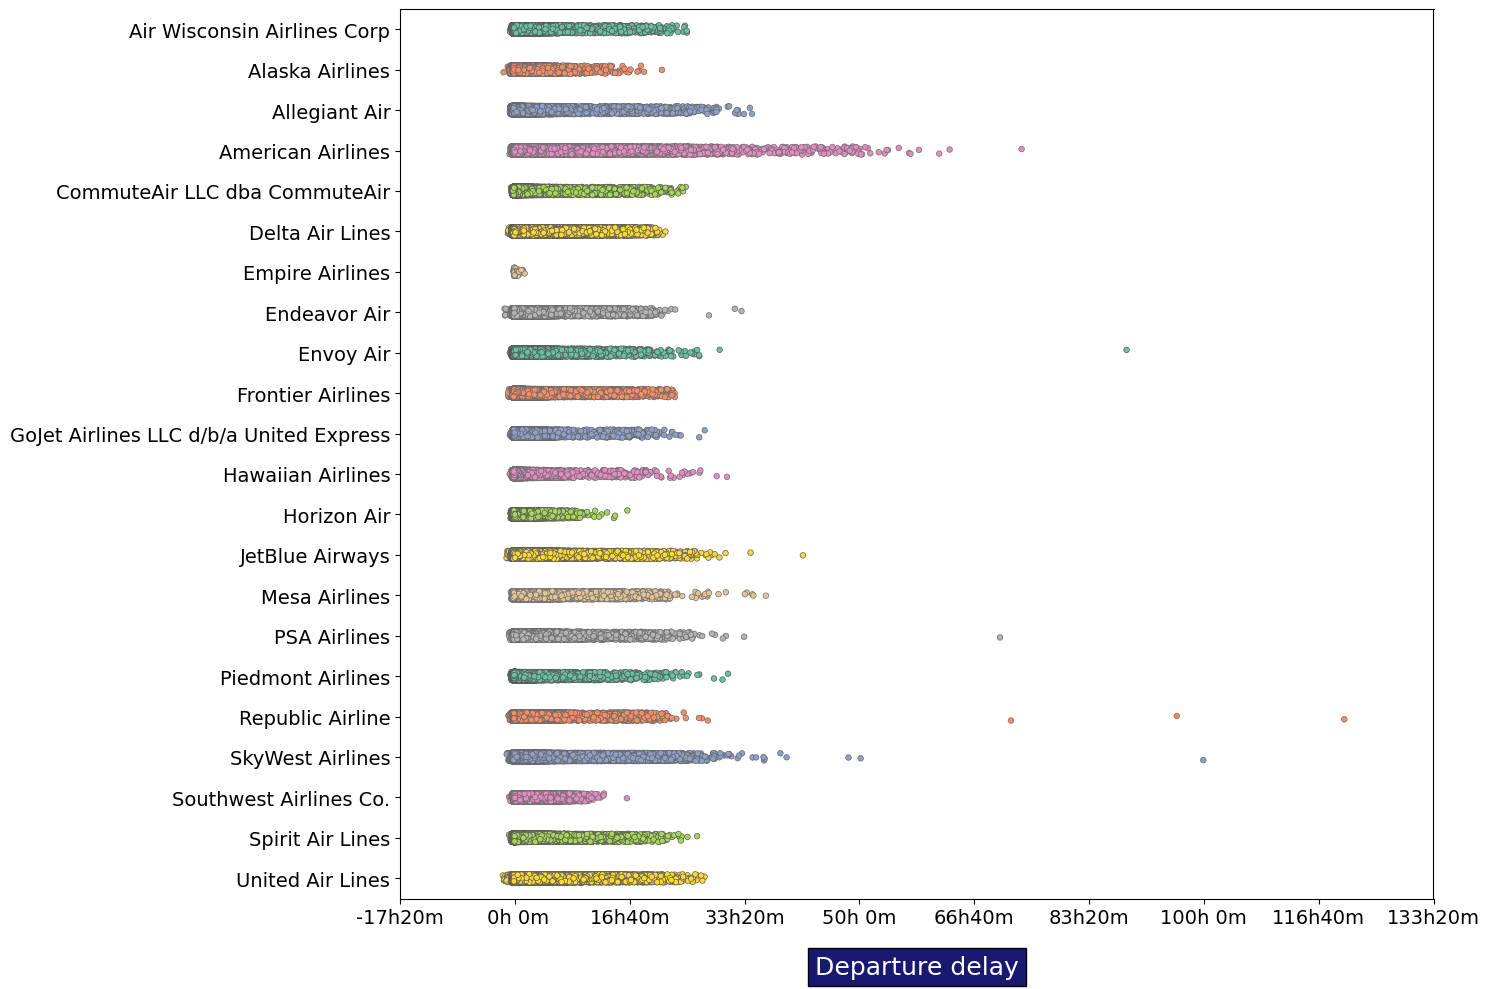

In [35]:
#count the number of unique airlines
num_unique_airlines = df['AIRLINE'].nunique()

#generate a custom color palette with the appropriate number of colors
colors = sns.color_palette("Set2", n_colors=num_unique_airlines)

#plot the stripplot with the custom palette
plt.figure(figsize=(15, 10))
ax3 = sns.stripplot(y="AIRLINE", x="DEP_DELAY", size=4, palette=colors,
                    data=df, linewidth=0.5, jitter=True)

plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticks(ax3.get_xticks())
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*divmod(x, 60)) for x in ax3.get_xticks()],
                    fontsize=14)

plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor': 'midnightblue', 'pad': 5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)

plt.tight_layout(w_pad=3)
plt.show()

In [36]:
#df on how many delays
global_stats = df['DEP_DELAY'].groupby(df['AIRLINE']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

min     max      count       mean
AIRLINE                                                                     
Empire Airlines                          -11.0    85.0      112.0   1.848214
GoJet Airlines LLC d/b/a United Express  -44.0  1653.0   152473.0  11.483896
Air Wisconsin Airlines Corp              -43.0  1498.0   199922.0  12.530072
Hawaiian Airlines                        -46.0  1847.0   213428.0   7.514440
CommuteAir LLC dba CommuteAir            -34.0  1488.0   220089.0  12.825366
Horizon Air                              -38.0   979.0   265184.0   4.851122
Piedmont Airlines                        -41.0  1856.0   280475.0   4.100266
Allegiant Air                            -45.0  2065.0   339665.0  16.372099
Mesa Airlines                            -35.0  2186.0   353210.0  16.850769
Frontier Airlines                        -59.0  1393.0   460387.0  18.740892
PSA Airlines                             -53.0  4225.0   620449.0   7.651380
Alaska Airlines                          -99.0  1280.0   651793.0   5.662802
Spirit Air Lines                         -52.0  1587.0   670834.0  15.541027
Endeavor Air                             -90.0  1973.0   687486.0   6.132484
Envoy Air                                -45.0  5327.0   718476.0   6.926624
JetBlue Airways                          -73.0  2508.0   731946.0  21.880971
Republic Airline                         -56.0  7223.0   917608.0   5.702346
United Air Lines                        -105.0  1652.0  1778194.0  11.658421
SkyWest Airlines                         -72.0  5995.0  2128199.0   9.811617
American Airlines                        -47.0  4413.0  2500286.0  14.945120
Delta Air Lines                          -60.0  1311.0  2598970.0   8.966831
Southwest Airlines Co.                   -52.0   975.0  3730507.0  13.097314

In [37]:
airport_mean_delays = pd.DataFrame(pd.Series(df['ORIGIN'].unique()))
airport_mean_delays.set_index(0, drop=True, inplace=True)

for airline_name in df['AIRLINE'].unique():
    df1 = df[df['AIRLINE'] == airline_name]
    test = df1['DEP_DELAY'].groupby(df['ORIGIN']).apply(get_stats).unstack()
    airport_mean_delays[airline_name] = test.loc[:, 'mean']

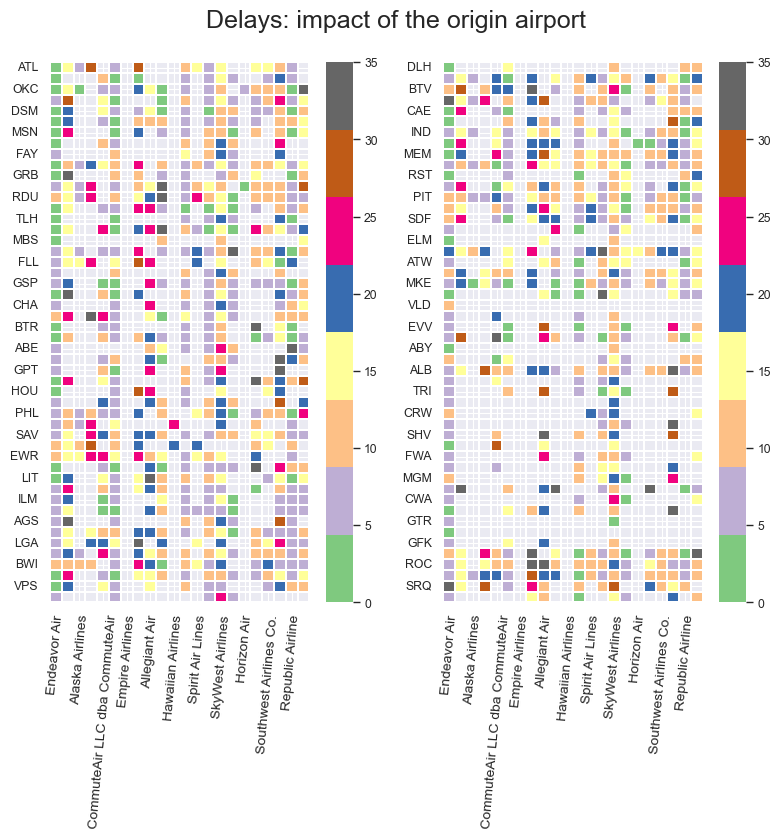

In [38]:
sns.set(context="paper")
fig = plt.figure(1, figsize=(8,8))

ax = fig.add_subplot(1,2,1)
subset = airport_mean_delays.iloc[:50,:].rename(columns=df['AIRLINE'])
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin=0, vmax=35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation=85)
ax.yaxis.label.set_visible(False)

ax = fig.add_subplot(1,2,2)
subset = airport_mean_delays.iloc[50:100,:].rename(columns=df['AIRLINE'])
fig.text(0.5, 1.02, "Delays: impact of the origin airport", ha='center', fontsize=18)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin=0, vmax=35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation=85)
ax.yaxis.label.set_visible(False)

plt.tight_layout()

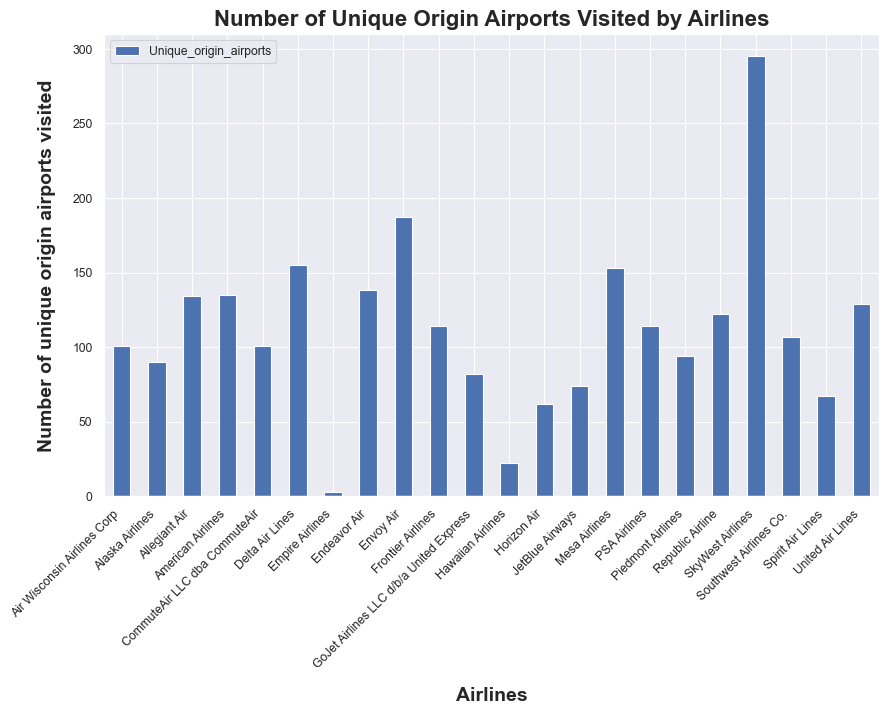

In [39]:
#count the number of unique origin airports visited per airline
unique_origin_airports = df.groupby('AIRLINE')['ORIGIN'].nunique().reset_index()

#rename the column for clarity
unique_origin_airports.rename(columns={'ORIGIN': 'Unique_origin_airports'}, inplace=True)

#plot the bar chart
ax = unique_origin_airports.set_index('AIRLINE').plot(kind='bar', figsize=(10, 6))

#set labels and title
plt.ylabel('Number of unique origin airports visited', fontsize=14, weight='bold', labelpad=12)
plt.xlabel('Airlines', fontsize=14, weight='bold', labelpad=12)
plt.xticks(rotation=45, ha='right')
plt.title('Number of Unique Origin Airports Visited by Airlines', fontsize=16, weight='bold')

plt.show()